# Import packages and Data

In [161]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
py.offline.init_notebook_mode(connected=True)
from math import floor
from plotly import tools
from plotly.graph_objs import *
from IPython.display import display
from chart_studio.widgets import GraphWidget

In [162]:
data = pd.read_csv("DataViz.csv")

In [163]:
data.head(3).transpose()

,0,1,2
budget,237000000,300000000,245000000
genres,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Adventure', 'Fantasy', 'Action']","['Action', 'Adventure', 'Crime']"
keywords,"['culture clash', 'future', 'space war', 'spac...","['ocean', 'drug abuse', 'exotic island', 'east...","['spy', 'based on novel', 'secret agent', 'seq..."
original_language,en,en,en
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...
popularity,150.438,139.083,107.377
production_companies,"['Ingenious Film Partners', 'Twentieth Century...","['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['Columbia Pictures', 'Danjaq', 'B24']"
production_countries,"['United States of America', 'United Kingdom']",['United States of America'],"['United Kingdom', 'United States of America']"
release_date,2009-12-10,2007-05-19,2015-10-26
revenue,2787965087,961000000,880674609


In [164]:
data.shape

(4790, 25)

In [165]:
data["profit"] = data["revenue"] - data["budget"]

In [166]:
data["profit"].describe()

count    4.790000e+03
mean     5.336400e+07
std      1.361221e+08
min     -1.657101e+08
25%     -7.985852e+05
50%      2.602056e+06
75%      5.546026e+07
max      2.550965e+09
Name: profit, dtype: float64

In [167]:
data[data["profit"]==data["profit"].max()]

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,crew,actor1,actor2,actor3,director,year,month,day,dow,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,...,"[{'credit_id': '52fe48009251416c750aca23', 'de...",Sam Worthington,Zoe Saldana,Sigourney Weaver,James Cameron,2009,12,10,3,2550965087


# Data Visualizations

## Plotly

### Average Profit by Day of Week

In [168]:
profit_by_dow = data[data["year"]>1990].groupby(["dow"]).profit.mean().reset_index()

In [169]:
bar_data = [go.Bar(x=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']\
                   , y=profit_by_dow["profit"])]

py.offline.iplot({ 'data': bar_data,
            'layout': {
               'title': 'Average Revenue by Day of Week',
               'xaxis': {
                 'title': 'Day of Week'},
               'yaxis': {
                'title': 'Profit'}
        }})

In [170]:
profit_by_month = data.groupby(["month"]).profit.mean().reset_index()

In [171]:
profit_by_month

,month,profit
0,1,1.436594e+07
1,2,3.139154e+07
2,3,4.375326e+07
3,4,4.731362e+07
4,5,9.402660e+07
5,6,1.087374e+08
6,7,7.281449e+07
7,8,3.221319e+07
8,9,2.278217e+07
9,10,3.152965e+07


### Violin Plots for Movie Ratings by Decade

In [172]:
def extract_decade(x):
    return str(floor(x/10)*10)+"s"

In [173]:
data["decade"] = data["year"].apply(extract_decade)

In [174]:
df = data

In [175]:
df = df.sort_values(by=['decade'], ascending=True)

In [176]:
df = df[df['decade'] != '1910s']

In [177]:
df_by_vote = df.groupby(['decade']).vote_count.sum().reset_index()

In [178]:
df_by_vote

,decade,vote_count
0,1920s,742
1,1930s,6182
2,1940s,7325
3,1950s,7203
4,1960s,27730
5,1970s,62479
6,1980s,146993
7,1990s,436488
8,2000s,1195879
9,2010s,1423967


In [179]:
bar_data = [go.Bar(x=df_by_vote['decade']\
                   , y=df_by_vote["vote_count"],
                     marker=dict(
                        color='rgb(127,188,65)'
                    ))]

py.offline.iplot({ 'data': bar_data,
            'layout': {
               'title': 'Vote Count for each Decade',
               'xaxis': {
                 'title': 'Decade'},
               'yaxis': {
                'title': 'Total Votes'}
        }})

In [180]:
df[df['decade'] == '1910s']

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,actor1,actor2,actor3,director,year,month,day,dow,profit,decade


Get rid of the 1910's decade since it has only 1 movie

In [181]:
df = df[df['decade'] != '1910s']

In [182]:
da = []
for i in range(0,len(pd.unique(df['decade']))):
    trace = {
            "type": 'violin',
            "x": df['decade'][df['decade'] == pd.unique(df['decade'])[i]],
            "y": df['vote_average'][df['decade'] == pd.unique(df['decade'])[i]],
            "name": pd.unique(df['decade'])[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    da.append(trace)

        
fig = {
    "data": da,
    "layout" : {
        "title": "Average Movie Ratings by Decade",
            "xaxis" : dict(title = 'Decade', autotick=False, showticklabels=True),
            "yaxis" : dict(title = 'Average Rating')
    }
}

iplot(fig, validate = False)

In [183]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'title', 'cast', 'crew', 'actor1',
       'actor2', 'actor3', 'director', 'year', 'month', 'day', 'dow', 'profit',
       'decade'],
      dtype='object')

### Bubble Chart for Profit vs Budget

In [184]:
min(df.budget.values)

0

In [185]:
min(df[df.budget>10000].budget.values)

12000

In [186]:
layout = go.Layout(
    title='Profit vs. Budget',
    xaxis=dict(
        title='Budget',
        gridcolor='rgb(255, 255, 255)',
        range=[0, 4e8],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Profit',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    )
)
data = [go.Scatter(
    x=df[df.budget>5000].budget.values, # Budget
    y=df[df.budget>5000].profit.values,  # Gross
    mode='markers',
    text= df[df.budget>5000].title.values, # Movie Titles
    marker=dict(
        size=3*(df[df.budget>5000].vote_average),
        sizeref=1.0,
        color=df[df.budget>5000].vote_average.values,
                
        colorbar=ColorBar(title='Average Rating<br> &nbsp;' , tickvals=[0,1.5,3,5,7,8.5]),

        showscale=True,
        colorscale='Viridis'
    ))]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

C:\Users\Soorma\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:180: DeprecationWarning:

plotly.graph_objs.ColorBar is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.marker.ColorBar
  - plotly.graph_objs.surface.ColorBar
  - etc.




In [187]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'title', 'cast', 'crew', 'actor1',
       'actor2', 'actor3', 'director', 'year', 'month', 'day', 'dow', 'profit',
       'decade'],
      dtype='object')

In [188]:
df.head().transpose()

,2638,4650,4448,4583,3802
budget,92620000,245000,0,379000,3950000
genres,"['Drama', 'Science Fiction']","['Drama', 'Romance', 'War']","['Drama', 'Thriller', 'Romance']","['Drama', 'Music', 'Romance']","['Action', 'Drama', 'History']"
keywords,"['man vs machine', 'underground world', 'inven...","['world war i', 'silent film']","['london england', 'casino', 'irony', 'forbidd...","['musical', 'singer', 'pre-code', 'wisecrack h...","['world war i', 'zeppelin', 'royal air force',..."
original_language,de,en,de,en,en
overview,In a futuristic city sharply divided between t...,The story of an idle rich boy who joins the US...,The rise and inevitable fall of an amoral but ...,"Harriet and Queenie Mahoney, a vaudeville act,...",Two brothers attending Oxford enlist with the ...
popularity,32.3515,0.785744,1.82418,0.968865,8.48412
production_companies,"['Paramount Pictures', 'Universum Film (UFA)']",['Metro-Goldwyn-Mayer (MGM)'],['Nero Films'],['Metro-Goldwyn-Mayer (MGM)'],['The Caddo Company']
production_countries,['Germany'],['United States of America'],['Germany'],['United States of America'],['United States of America']
release_date,1927-01-10,1925-11-05,1929-01-30,1929-02-08,1930-11-15
revenue,650422,22000000,0,4358000,8000000


Remove movies with a runtime of 0

### Bubble Chart for Profit vs Runtime

In [189]:
df2 = df[df.runtime > 20]

In [190]:
layout = go.Layout(
    title='Profit vs. Runtime',
    xaxis=dict(
        title='Runtime',
        gridcolor='rgb(255, 255, 255)',
        range=[0, 250],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Profit',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    )
)
data = [go.Scatter(
    x=df2.runtime.values, # Budget
    y=df2.profit.values,  # Gross
    mode='markers',
    text= df2.title.values, # Movie Titles
    marker=dict(
        size=3*(df2.vote_average),
        sizeref=1.0,
        color=df2.vote_average.values,
        colorbar=ColorBar(title='Average Rating<br> &nbsp;'),
        showscale=True,
        colorscale='Viridis'
    ))]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Directors with the highest average profit and movie ratings

In [198]:
data = pd.read_csv("DataViz.csv")
data["profit"] = data["revenue"] - data["budget"]

In [199]:
df = data

In [200]:
director_df = df.groupby('director', as_index=False)
director_df = director_df.mean()

In [201]:
name_counts = df['director'].value_counts().to_dict() # dictionary of director and number of rows/movies per
name_counts

{'Steven Spielberg': 27,
 'Woody Allen': 21,
 'Clint Eastwood': 20,
 'Martin Scorsese': 20,
 'Ridley Scott': 16,
 'Spike Lee': 16,
 'Robert Rodriguez': 16,
 'Steven Soderbergh': 15,
 'Renny Harlin': 15,
 'Oliver Stone': 14,
 'Tim Burton': 14,
 'Barry Levinson': 13,
 'Robert Zemeckis': 13,
 'Joel Schumacher': 13,
 'Ron Howard': 13,
 'Brian De Palma': 12,
 'Kevin Smith': 12,
 'Michael Bay': 12,
 'Francis Ford Coppola': 12,
 'Tony Scott': 12,
 'Richard Linklater': 11,
 'Sam Raimi': 11,
 'Richard Donner': 11,
 'Rob Reiner': 11,
 'Chris Columbus': 11,
 'Bobby Farrelly': 11,
 'Shawn Levy': 11,
 'Joel Coen': 11,
 'John McTiernan': 10,
 'John Carpenter': 10,
 'David Fincher': 10,
 'Wes Craven': 10,
 'Stephen Frears': 10,
 'Paul W.S. Anderson': 10,
 'Peter Jackson': 9,
 'Tyler Perry': 9,
 'Dennis Dugan': 9,
 'Lasse Hallström': 9,
 'Brett Ratner': 9,
 'M. Night Shyamalan': 9,
 'Phillip Noyce': 9,
 'Rob Cohen': 9,
 'Bryan Singer': 8,
 'F. Gary Gray': 8,
 'Jay Roach': 8,
 'Adam Shankman': 8,
 'Chr

In [202]:
director_df['film_count'] = director_df['director'].map(name_counts) # match the film count to the director

In [203]:
director_df.head(3)

,director,budget,popularity,revenue,runtime,vote_average,vote_count,year,month,day,dow,profit,film_count
0,Aaron Hann,0.0,6.752141,0.0,87.0,6.0,333.0,2015.0,10.0,2.0,4.0,0.0,1
1,Aaron Schneider,7500000.0,6.557643,0.0,103.0,6.5,100.0,2010.0,1.0,22.0,4.0,-7500000.0,1
2,Abel Ferrara,12500000.0,2.950618,1227324.0,99.0,7.3,31.0,1996.0,1.0,26.0,4.0,-11272676.0,1


In [204]:
director_df.sort_values('profit', ascending=False, inplace=True)

In [205]:
director_df['director+count'] = director_df['director'].map(str) + " (" + director_df['film_count'].map(str) + ")"

In [206]:
director_df.head(3)

,director,budget,popularity,revenue,runtime,vote_average,vote_count,year,month,day,dow,profit,film_count,director+count
318,Chris Buck,150000000.0,165.125366,1.274219e+09,102.0,7.3,5295.0,2013.0,11.0,27.0,2.0,1.124219e+09,1,Chris Buck (1)
1281,Kyle Balda,74000000.0,875.581305,1.156731e+09,91.0,6.4,4571.0,2015.0,6.0,17.0,2.0,1.082731e+09,1,Kyle Balda (1)
1305,Lee Unkrich,200000000.0,59.995418,1.066970e+09,103.0,7.6,4597.0,2010.0,6.0,16.0,2.0,8.669697e+08,1,Lee Unkrich (1)


In [207]:
dir_means = director_df[['director+count',  'film_count', 'profit']]

In [208]:
dir_means.head(3)

,director+count,film_count,profit
318,Chris Buck (1),1,1.124219e+09
1281,Kyle Balda (1),1,1.082731e+09
1305,Lee Unkrich (1),1,8.669697e+08


In [209]:
dir_subset = director_df[director_df['film_count'] > 5]

Average profit and movie rating for directors who have produced more than 5 movies

In [210]:
top10pro = dir_subset.sort_values(ascending = False, by = 'profit')[['director+count','profit']].head(10)
top10pro.head(3)

,director+count,profit
880,James Cameron (7),7.338099e+08
1731,Peter Jackson (9),5.784048e+08
360,Christopher Nolan (8),4.028104e+08


In [211]:
top10rat = dir_subset.sort_values(ascending = False, by = 'vote_average')[['director+count', 'vote_average']].head(10)
top10rat.head(3)

,director+count,vote_average
360,Christopher Nolan (8),7.800000
1772,Quentin Tarantino (8),7.775000
2049,Stanley Kubrick (6),7.683333


In [212]:
y=top10pro['director+count']

In [213]:
data = [go.Bar(
            x=top10pro['profit'],
            y=top10pro['director+count'],
            orientation = 'h',
            marker=dict(
            color='rgb(127,205,187)'
        )
)]

layout = dict(
        title='Average Profit for Directors who have directed more than 5 movies',
        margin=go.Margin(
        l=210,
        r=100,
        pad=1),
        xaxis=dict(
            title='Average Profit'
        ),
    
        yaxis=dict(
            title='&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Director (Number of Movies)',
            tickfont=dict(
                size=12,
            )
        )
    
    )
    

fig = go.Figure(data = data, layout = layout)

iplot(fig)

C:\Users\Soorma\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [214]:
import chart_studio.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=top10rat['vote_average'],
            y=top10rat['director+count'],
            orientation = 'h',
            marker=dict(
            color='rgb(67,162,202)'
        )
)]

layout = dict(
        title='Average Movie Rating for Directors who have directed more than 5 movies',
        margin=go.Margin(
        l=210,
        r=100,
        b=100,
        t=100,
        pad=1),
            xaxis=dict(
            title='Average Rating'
        ),
    
        yaxis=dict(
            title='&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Director (Number of Movies)',
            tickfont=dict(
                size=12,
            )
        )
    
    )

fig = go.Figure(data = data, layout = layout)

iplot(fig)

### Network Graph of main actors

title year is the year the movie was released
actor1 is actor_1 and so on

df_appearance = df_reduced[['actor_1_name', 'title_year']].groupby('actor_1_name').count()
appearance df is grouping the actor1 name and year of movie by the name, and seeing the count of number of movies an actor has had in a specific year

only want actors who have appeared in more than 4 movies per year
selection = df_appearance['title_year'] > 4

most_prolific = df_actors[selection] # these actors



In [215]:
df_reduced = df[['actor1', 'vote_average',
                 'year', 'title']].reset_index(drop = True)

In [216]:
df_appearance = df[['actor1', 'year']].groupby('actor1').count().reset_index()

In [217]:
most_prolific = list(df_appearance['actor1'][np.array(df_appearance['year'] > 3)])

In [218]:
len(most_prolific)

277

In [219]:
subset1 = df[df.actor1.isin(most_prolific) &\
            df.actor2.isin(most_prolific) & df.actor3.isin(most_prolific)].reset_index(drop = True)

In [220]:
subset2 = df[df.actor1.isin(most_prolific) |\
            df.actor2.isin(most_prolific) | df.actor3.isin(most_prolific)].reset_index(drop = True)

In [221]:
subset1.shape

(227, 26)

In [222]:
subset1

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,crew,actor1,actor2,actor3,director,year,month,day,dow,profit
0,250000000,"['Action', 'Crime', 'Drama', 'Thriller']","['dc comics', 'crime fighter', 'terrorist', 's...",en,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,...,"[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christian Bale,Michael Caine,Gary Oldman,Christopher Nolan,2012,7,16,0,834939099
1,258000000,"['Fantasy', 'Action', 'Adventure']","['dual identity', 'amnesia', 'sandstorm', ""lov...",en,The seemingly invincible Spider-Man goes up ag...,115.699814,"['Columbia Pictures', 'Laura Ziskin Production...",['United States of America'],2007-05-01,890871626,...,"[{'credit_id': '52fe4252c3a36847f80151a5', 'de...",Tobey Maguire,Kirsten Dunst,James Franco,Sam Raimi,2007,5,1,1,632871626
2,225000000,"['Action', 'Comedy', 'Science Fiction']","['time travel', 'time machine', 'alien', 'fict...",en,Agents J (Will Smith) and K (Tommy Lee Jones) ...,52.035179,"['Amblin Entertainment', 'Media Magik Entertai...",['United States of America'],2012-05-23,624026776,...,"[{'credit_id': '52fe45b7c3a36847f80d68c7', 'de...",Will Smith,Tommy Lee Jones,Josh Brolin,Barry Sonnenfeld,2012,5,23,2,399026776
3,207000000,"['Adventure', 'Drama', 'Action']","['film business', 'screenplay', 'show business...",en,"In 1933 New York, an overly ambitious movie pr...",61.226010,"['WingNut Films', 'Universal Pictures', 'Big P...","['New Zealand', 'United States of America', 'G...",2005-12-14,550000000,...,"[{'credit_id': '52fe422ec3a36847f800a1d7', 'de...",Naomi Watts,Jack Black,Adrien Brody,Peter Jackson,2005,12,14,2,343000000
4,250000000,"['Adventure', 'Action', 'Science Fiction']","['civil war', 'war', 'marvel comic', 'sequel',...",en,"Following the events of Age of Ultron, the col...",198.372395,"['Studio Babelsberg', 'Marvel Studios', 'Walt ...",['United States of America'],2016-04-27,1153304495,...,"[{'credit_id': '569443d59251414b67000428', 'de...",Chris Evans,Robert Downey Jr.,Scarlett Johansson,Anthony Russo,2016,4,27,2,903304495
5,200000000,"['Action', 'Adventure', 'Thriller']","['spy', 'secret agent', 'sociopath', 'killer',...",en,When Bond's latest assignment goes gravely wro...,93.004993,['Columbia Pictures'],"['United Kingdom', 'United States of America']",2012-10-25,1108561013,...,"[{'credit_id': '52fe46689251416c910537ad', 'de...",Daniel Craig,Judi Dench,Javier Bardem,Sam Mendes,2012,10,25,3,908561013
6,200000000,"['Action', 'Adventure', 'Fantasy']","['dual identity', ""love of one's life"", 'pizza...",en,Peter Parker is going through a major identity...,35.149586,"['Columbia Pictures', 'Laura Ziskin Production...",['United States of America'],2004-06-25,783766341,...,"[{'credit_id': '52fe4252c3a36847f8015039', 'de...",Tobey Maguire,Kirsten Dunst,James Franco,Sam Raimi,2004,6,25,4,583766341
7,200000000,"['Action', 'Science Fiction', 'Thriller']","['saving the world', 'artificial intelligence'...",en,"All grown up in post-apocalyptic 2018, John Co...",71.862892,"['Columbia Pictures', 'The Halcyon Company', '...","['Germany', 'Italy', 'United Kingdom', 'United...",2009-05-20,371353001,...,"[{'credit_id': '52fe424ec3a36847f8013ffd', 'de...",Christian Bale,Sam Worthington,Anton Yelchin,McG,2009,5,20,2,171353001
8,190000000,['Action'],"['car race', 'speed', 'revenge', 'suspense', '...",en,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"['Universal Pictures', 'Original Film', 'Fuji ...","['Japan', 'United States of America']",2015-04-01,1506249360,...,"[{'credit_id': '52fe4cc8c3a36847f823e699', 'de...",Vin Diesel,Paul Walker,Dwayne Johnson,James Wan,2015,4,1,2,1316249360
9,250000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['1970s', 'mutant', 'time travel', 'marvel com...",en,The ultimate X-Men ensemble fights a war for t...,118.0

In [223]:
import chart_studio.plotly as py
from plotly.graph_objs import *
import networkx as nx

In [224]:
pair = []
for i in range(subset1.shape[0]):
    pair.append((subset1.loc[i,"actor1"],subset1.loc[i,"actor2"]))
    pair.append((subset1.loc[i,"actor1"],subset1.loc[i,"actor3"]))
    pair.append((subset1.loc[i,"actor2"],subset1.loc[i,"actor3"]))

In [225]:
len(pair), subset1.shape[0]

(681, 227)

In [226]:
from collections import *
counter = Counter(tuple(sorted(tup)) for tup in pair)

In [227]:
len(counter)

619

In [228]:
edges = []
for i in range(len(counter)):
    edges.append((list(counter.keys())[i][0],list(counter.keys())[i][1],list(counter.values())[i]))

In [229]:
G=nx.Graph()
# G.add_weighted_edges_from(edges)
G.add_edges_from(pair)
# G.add_nodes_from(most_prolific)

In [230]:
print(nx.info(G)) 

Name: 
Type: Graph
Number of nodes: 216
Number of edges: 619
Average degree:   5.7315


In [231]:
nodes = list(G.node)
d = dict(nx.degree(G))

In [232]:
imp_actors = sorted(d, key=d.get)[201:]

In [233]:
len(d)

216

In [234]:
pos=nx.kamada_kawai_layout(G)  

In [235]:
Xv=[pos[k][0] for k in nodes]
Yv=[pos[k][1] for k in nodes]
Xed=[]
Yed=[]
for edge in edges:
    Xed+=[pos[edge[0]][0],pos[edge[1]][0], None]
    Yed+=[pos[edge[0]][1],pos[edge[1]][1], None] 
    
trace3=Scatter(x=Xed,
               y=Yed,
               mode='lines',
               line=Line(color='rgb(210,210,210)', width=1),
               hoverinfo='none'
               )
trace4=Scatter(x=Xv,
               y=Yv,
               mode='markers',
               name='net',
               marker=Marker(symbol='dot',
                             size=10, 
               showscale=True,
               colorscale = 'Viridis',
               reversescale = False,
                             
               colorbar=ColorBar(title='Number of Connections<br> &nbsp;', tickvals=[2,4,6,8,10,12,14,16,18,20,22,24]),

               color= list(d.values()),
               line=Line(color='rgb(50,50,50)', width=0.5)
               ),
               text=nodes,
               hoverinfo='text'
               )
    
    

layout=Layout(title= "Leading Actors and their Connections",  
    font= Font(size=12),
    showlegend=False, 
    xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
    ),         
    )

data1=Data([trace3, trace4])
fig1=Figure(data=data1, layout=layout)
iplot(fig1)

C:\Users\Soorma\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


C:\Users\Soorma\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:180: DeprecationWarning:

plotly.graph_objs.ColorBar is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.marker.ColorBar
  - plotly.graph_objs.surface.ColorBar
  - etc.


C:\Users\Soorma\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




ValueError: 
    Invalid value of type 'builtins.str' received for the 'symbol' property of scatter.marker
        Received value: 'dot'

    The 'symbol' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            [0, 'circle', 100, 'circle-open', 200, 'circle-dot', 300,
            'circle-open-dot', 1, 'square', 101, 'square-open', 201,
            'square-dot', 301, 'square-open-dot', 2, 'diamond', 102,
            'diamond-open', 202, 'diamond-dot', 302,
            'diamond-open-dot', 3, 'cross', 103, 'cross-open', 203,
            'cross-dot', 303, 'cross-open-dot', 4, 'x', 104, 'x-open',
            204, 'x-dot', 304, 'x-open-dot', 5, 'triangle-up', 105,
            'triangle-up-open', 205, 'triangle-up-dot', 305,
            'triangle-up-open-dot', 6, 'triangle-down', 106,
            'triangle-down-open', 206, 'triangle-down-dot', 306,
            'triangle-down-open-dot', 7, 'triangle-left', 107,
            'triangle-left-open', 207, 'triangle-left-dot', 307,
            'triangle-left-open-dot', 8, 'triangle-right', 108,
            'triangle-right-open', 208, 'triangle-right-dot', 308,
            'triangle-right-open-dot', 9, 'triangle-ne', 109,
            'triangle-ne-open', 209, 'triangle-ne-dot', 309,
            'triangle-ne-open-dot', 10, 'triangle-se', 110,
            'triangle-se-open', 210, 'triangle-se-dot', 310,
            'triangle-se-open-dot', 11, 'triangle-sw', 111,
            'triangle-sw-open', 211, 'triangle-sw-dot', 311,
            'triangle-sw-open-dot', 12, 'triangle-nw', 112,
            'triangle-nw-open', 212, 'triangle-nw-dot', 312,
            'triangle-nw-open-dot', 13, 'pentagon', 113,
            'pentagon-open', 213, 'pentagon-dot', 313,
            'pentagon-open-dot', 14, 'hexagon', 114, 'hexagon-open',
            214, 'hexagon-dot', 314, 'hexagon-open-dot', 15,
            'hexagon2', 115, 'hexagon2-open', 215, 'hexagon2-dot',
            315, 'hexagon2-open-dot', 16, 'octagon', 116,
            'octagon-open', 216, 'octagon-dot', 316,
            'octagon-open-dot', 17, 'star', 117, 'star-open', 217,
            'star-dot', 317, 'star-open-dot', 18, 'hexagram', 118,
            'hexagram-open', 218, 'hexagram-dot', 318,
            'hexagram-open-dot', 19, 'star-triangle-up', 119,
            'star-triangle-up-open', 219, 'star-triangle-up-dot', 319,
            'star-triangle-up-open-dot', 20, 'star-triangle-down',
            120, 'star-triangle-down-open', 220,
            'star-triangle-down-dot', 320,
            'star-triangle-down-open-dot', 21, 'star-square', 121,
            'star-square-open', 221, 'star-square-dot', 321,
            'star-square-open-dot', 22, 'star-diamond', 122,
            'star-diamond-open', 222, 'star-diamond-dot', 322,
            'star-diamond-open-dot', 23, 'diamond-tall', 123,
            'diamond-tall-open', 223, 'diamond-tall-dot', 323,
            'diamond-tall-open-dot', 24, 'diamond-wide', 124,
            'diamond-wide-open', 224, 'diamond-wide-dot', 324,
            'diamond-wide-open-dot', 25, 'hourglass', 125,
            'hourglass-open', 26, 'bowtie', 126, 'bowtie-open', 27,
            'circle-cross', 127, 'circle-cross-open', 28, 'circle-x',
            128, 'circle-x-open', 29, 'square-cross', 129,
            'square-cross-open', 30, 'square-x', 130, 'square-x-open',
            31, 'diamond-cross', 131, 'diamond-cross-open', 32,
            'diamond-x', 132, 'diamond-x-open', 33, 'cross-thin', 133,
            'cross-thin-open', 34, 'x-thin', 134, 'x-thin-open', 35,
            'asterisk', 135, 'asterisk-open', 36, 'hash', 136,
            'hash-open', 236, 'hash-dot', 336, 'hash-open-dot', 37,
            'y-up', 137, 'y-up-open', 38, 'y-down', 138,
            'y-down-open', 39, 'y-left', 139, 'y-left-open', 40,
            'y-right', 140, 'y-right-open', 41, 'line-ew', 141,
            'line-ew-open', 42, 'line-ns', 142, 'line-ns-open', 43,
            'line-ne', 143, 'line-ne-open', 44, 'line-nw', 144,
            'line-nw-open']
      - A tuple, list, or one-dimensional numpy array of the above

### Top Actor Comparison

In [236]:
features = []
for item in imp_actors:
    group = df.loc[(df['actor1'] == item) | (df['actor2']== item) ]
    features.append((item, group.profit.mean(), group.vote_average.mean(), group.popularity.mean(), d[item]))

In [237]:
top15 = pd.DataFrame(features)

In [238]:
top15

,0,1,2,3,4
0,Scarlett Johansson,2.916515e+07,6.437500,33.564579,13
1,Russell Crowe,7.690823e+07,6.600000,33.467027,13
2,Cameron Diaz,1.206145e+08,5.994118,38.642755,14
3,Tom Cruise,2.369365e+08,6.646154,48.156016,14
4,Brad Pitt,1.353495e+08,6.813793,48.674368,14
5,Matt Damon,9.884363e+07,6.636364,36.726481,14
6,Meryl Streep,8.384653e+07,6.482609,25.091077,14
7,Christian Bale,1.388917e+08,6.935000,55.938757,15
8,Jude Law,5.998734e+07,6.371429,29.928448,15
9,Kate Winslet,1.448356e+08,7.007143,30.104512,15


In [239]:
top15.columns = ["Actor","Avg. Profit", "Avg. Vote", "Avg. Popularity", "Connections with Other Important Actors)"]


In [240]:
import chart_studio.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=top15['Avg. Profit'],
            y=top15['Actor'],
            orientation = 'h',
            marker=dict(
            color='rgb(127,205,187)'
        )
)]

layout = dict(
        title='Average Profit for Important Actors (Ordered by Connections)',
        margin=go.Margin(
        l=210,
        r=100,
        pad=1),
        xaxis=dict(
            title='Average Profit'
        ),
    
        yaxis=dict(
            title='&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Actors',
            tickfont=dict(
                size=12,
            )
        )
    
    )
    

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [241]:
import chart_studio.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=top15['Avg. Popularity'],
            y=top15['Actor'],
            orientation = 'h',
            marker=dict(
            color='rgb(127,205,187)'
        )
)]

layout = dict(
        title='Average Popularity for Important Actors (Ordered by Connections)',
        margin=go.Margin(
        l=210,
        r=100,
        pad=1),
        xaxis=dict(
            title='Average Vote'
        ),
    
        yaxis=dict(
            title='&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Actors',
            tickfont=dict(
                size=12,
            )
        )
    
    )
    

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [242]:
top15['Actor1'] = top15['Actor']+ " ("+ top15['Connections with Other Important Actors)'].astype('str') + ")"

In [243]:
trace1 = go.Bar(    y=top15["Actor1"],
                        orientation = 'h',
                        x=top15["Avg. Profit"]/1000000,
                        name='Profit',
                        marker=dict(
                    color='rgb(161,215,106)'
                ))
                        

trace2 = go.Bar(y=top15["Actor1"],
                   orientation = 'h',
                    x=top15["Avg. Popularity"],
                    marker=dict(
                        color='rgb(37,52,148)'
                        #color='rgb(65,182,196)'
                    ),
                    name='Popularity')
                

trace3 = go.Bar(y=top15["Actor1"],
                   orientation = 'h',
                    x=top15["Avg. Vote"]*10,
                    name='Vote',
                    marker=dict(
                        #color='rgb(37,52,148)'
                        color='rgb(65,182,196)'
                    )
               )


data = [trace1, trace2, trace3]


updatemenus = list([
    dict(active=-1,
         x=-0.3,
         buttons=list([  
             
            dict(
                label = 'Average Profit (in Millions)',
                 method = 'update',
                 args = [{'visible': [True, False, False]}, 
                     {'title': 'Average Profit'}]),
             
             dict(
                  label = 'Average Popularity',
                 method = 'update',
                 args = [{'visible': [False, True, False]},
                     {'title': 'Average Popularity'}]),

            dict(
                 label = 'Average Vote',
                 method = 'update',
                 args = [{'visible': [False, False, True]},
                     {'title': 'Average Vote'}])
        ]),
    )
])

layout = dict(title='Average Measures for Important Actors', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)

iplot(fig)

## Bokeh and Matplotlib

In [244]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, output_file, show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker, LogTicker, ContinuousTicker, AdaptiveTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange
)
import bokeh.palettes
from bokeh.transform import factor_cmap
from wordcloud import WordCloud, STOPWORDS
from math import floor
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter
from bokeh.resources import CDN
from bokeh.embed import file_html

%config InlineBackend.figure_format = 'retina'

In [245]:
output_notebook()

Loading BokehJS ...

In [247]:
data = pd.read_csv("DataViz.csv")

In [248]:
data["profit"] = data["revenue"] - data["budget"]

### Temporal Pattern in Profit

In [249]:
profit_by_month_year = data[data["year"]>1990].groupby(["year","month"]).profit.mean().reset_index()
count_by_month_year = data[data["year"]>1990].groupby(["year","month"]).size().reset_index()

In [250]:
profit_by_month_year[:3]

,year,month,profit
0,1991,1,-7103420.0
1,1991,2,253742922.0
2,1991,3,24708446.5


In [251]:
newdata = ColumnDataSource(profit_by_month_year)

mapper = LinearColorMapper(palette=bokeh.palettes.RdBu[9], 
                           low=profit_by_month_year["profit"].min(), high=profit_by_month_year["profit"].max())


hover = HoverTool(
    tooltips=[
        ("profit", "@profit{$,}"),
    ]
)    

TOOLS = [hover,"save,pan,box_zoom,reset,wheel_zoom"]


p = figure(x_axis_label = 'Year', 
           y_axis_label = 'Month',
           tools=TOOLS,
           plot_width = 900)

p.rect(x="year", y="month",width=1, height=1,source = newdata,
       fill_color={'field': 'profit', 'transform': mapper})

color_bar = ColorBar(color_mapper=mapper, location=(20, 0), label_standoff=18,
                     ticker= AdaptiveTicker(), formatter = NumeralTickFormatter(format="$,") )

p.add_layout(color_bar, 'right')

p.title.text = "Movie Profit by Year and Month"
p.title.align = "center"
p.title.text_font_size = "20px"

show(p)

### Genre Exploration

In [252]:
df1 = pd.concat([pd.Series(row['year'], row['genres'].replace('[','').replace(']','').replace("'","").split(','))              
                    for _, row in data[data["year"]>1990][["year","genres"]].iterrows()]).reset_index()
df2 = pd.concat([pd.Series(row['profit'], row['genres'].replace('[','').replace(']','').replace("'","").split(','))              
                    for _, row in data[data["year"]>1990][["profit","genres"]].iterrows()]).reset_index()

In [253]:
df1.columns = ["genres","year"]
df2.columns = ["genres","profit"]

In [254]:
df1.shape, df2.shape

((10723, 2), (10723, 2))

In [255]:
df1["profit"] = df2["profit"]
df1["genres"] = df1["genres"].apply(lambda x: x.strip())
del df2

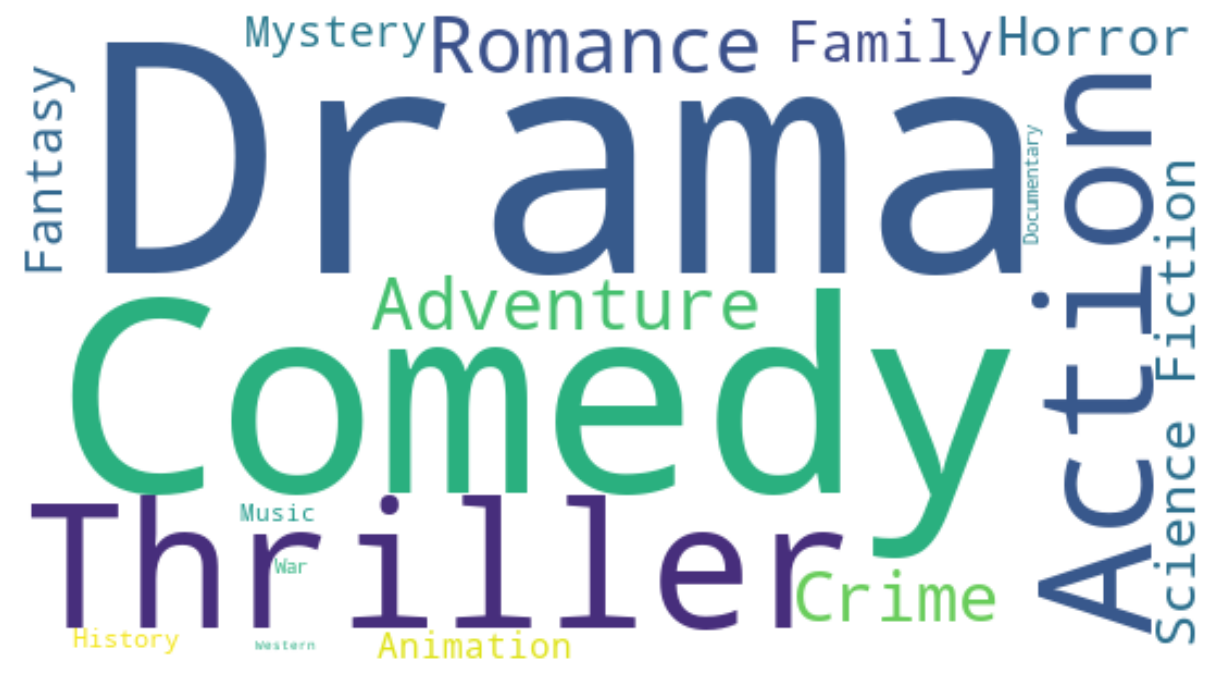

In [256]:
words = dict()
trunc_occurences = df1.groupby(["genres"]).size().sort_values(ascending=False).reset_index()
trunc_occurences.columns = ["genres", "frequency"]
for i in range(18):
    words[trunc_occurences["genres"][i]] = trunc_occurences["frequency"][i]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white', 
                      max_words=1628,relative_scaling=0.7,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [257]:
genres = ["Drama","Comedy","Action","Adventure","Crime","Science", "Fiction","Family"]

In [258]:
grouped_data = df1[df1["genres"].isin(genres)].groupby(["genres","year"]).profit.mean().reset_index()

In [259]:
dict_group_data = {"xs":[grouped_data.loc[(grouped_data["genres"]==name),"year"].values \
                         for name in grouped_data['genres'].unique()],
                  "ys": [grouped_data.loc[(grouped_data["genres"]==name),"profit"].values\
                         for name in grouped_data['genres'].unique()],
                  "labels": grouped_data["genres"].unique(),
                  "color": bokeh.palettes.Category10[9]}

source = ColumnDataSource(dict_group_data)

hover = HoverTool(tooltips=[
    ("Genre", "@labels"),
])

p = figure(x_axis_label = 'Year', 
           y_axis_label = 'Profit', 
           width = 1000,
           tools=[hover, "save","pan","box_zoom","reset","wheel_zoom"]) 
p.yaxis[0].formatter = NumeralTickFormatter(format="$,")

p.multi_line(xs= "xs", ys= "ys", line_color= "color", source = source, legend = "labels",line_width=3)
p.legend.location = "top_left"

p.title.text = "Profit for each Genre across years"
p.title.align = "center"
p.title.text_font_size = "20px"

show(p)

### Finding Correlation between Profit & Popularity

In [260]:
data["profit"].corr(data["popularity"])

0.6206384045302813

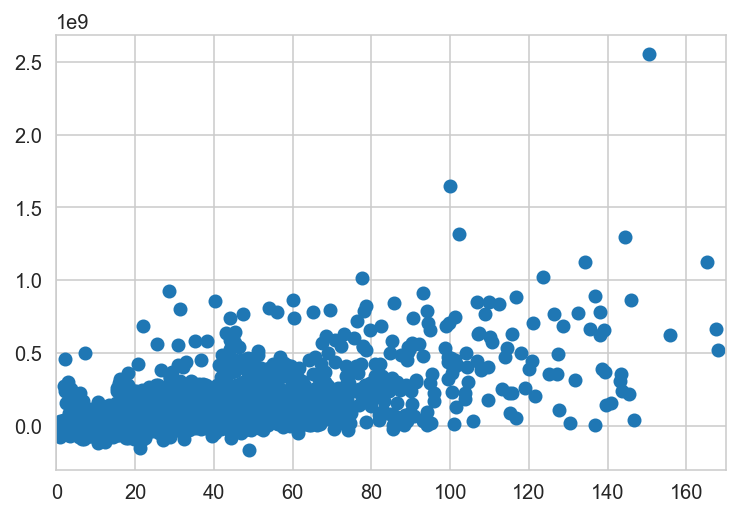

In [261]:
plt.scatter(data["popularity"],data["profit"])
plt.xlim([0,170])
plt.show()

### Decade Extracting & Checking Trends Decade-wise

In [262]:
def extract_decade(x):
    return str(floor(x/10)*10)+"s"

In [263]:
data["decade"] = data["year"].apply(extract_decade)

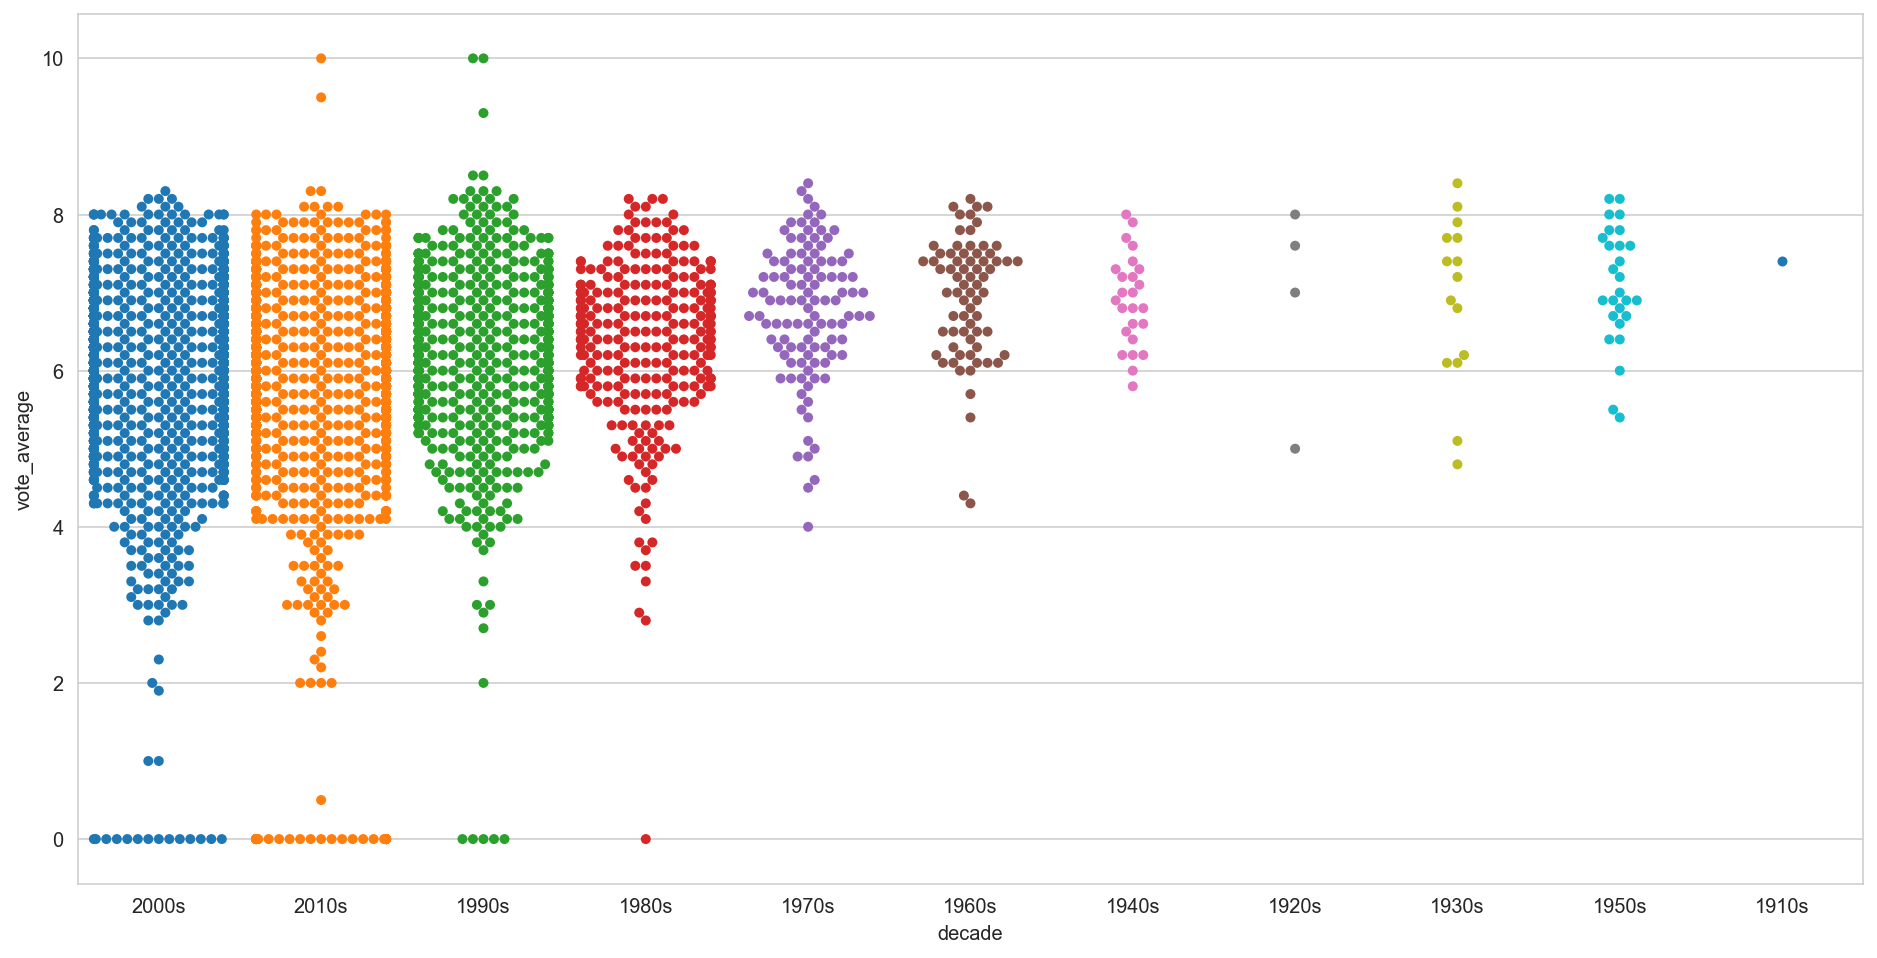

In [264]:
fig=plt.figure(figsize=(16, 8))
sns.swarmplot(x="decade", y="vote_average", data=data , palette="tab10" )
plt.show()